In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
States_df = pd.read_csv(r'C:\Users\billy\Documents\NSS_projects\open-secrets-skittles\Data\States_clean_df.csv')

In [3]:
States_df

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,CRPICO
0,Alabama,1,Jerry Carl (R),R,1971321.50,1859348.91,111972.59,W,1,O
1,Alabama,1,James Averhart (D),D,80094.95,78973.24,1121.71,L,0,O
2,Alabama,2,Barry Moore (R),R,650806.75,669367.70,-18560.95,W,1,O
3,Alabama,2,Phyllis Harvey-Hall (D),D,56049.68,55988.07,61.61,L,0,O
4,Alabama,3,Mike D Rogers (R),R,1193111.43,1218563.76,-25452.33,W,1,I
...,...,...,...,...,...,...,...,...,...,...
846,Wisconsin,7,Tricia Zunker (D),D,1261957.30,1232690.26,29267.04,L,0,C
847,Wisconsin,8,Mike Gallagher (R),R,3202904.74,2841800.71,361104.03,W,1,I
848,Wisconsin,8,Amanda Stuck (D),D,416978.45,399915.94,17062.51,L,0,C
849,Wyoming,1,Liz Cheney (R),R,3003883.34,3060166.78,-56283.44,W,1,I


In [4]:
CRPICO_Result = (
    States_df
    .groupby('CRPICO')['Winner']
    .value_counts(normalize=True)
    .reset_index()
)
# I needed to compare the columns comprising the Incumbent, Challenger, and Open variables and result of the race.
# I reset it to create a pandas dataframe. 

In [5]:
CRPICO_Result = CRPICO_Result.drop(CRPICO_Result.loc[CRPICO_Result['CRPICO'] == 'O'].index).replace({'I':'Incumbent', 'C':'Challenger'})

In [6]:
CRPICO_Result

,CRPICO,Winner,proportion
0,Challenger,0,0.966102
1,Challenger,1,0.033898
2,Incumbent,1,0.966321
3,Incumbent,0,0.033679


In [7]:
Winners = CRPICO_Result[CRPICO_Result['Winner'] == 1]

In [8]:
Winners

,CRPICO,Winner,proportion
1,Challenger,1,0.033898
2,Incumbent,1,0.966321


In [9]:
CRPICO = Winners['CRPICO']
proportion = Winners['proportion']

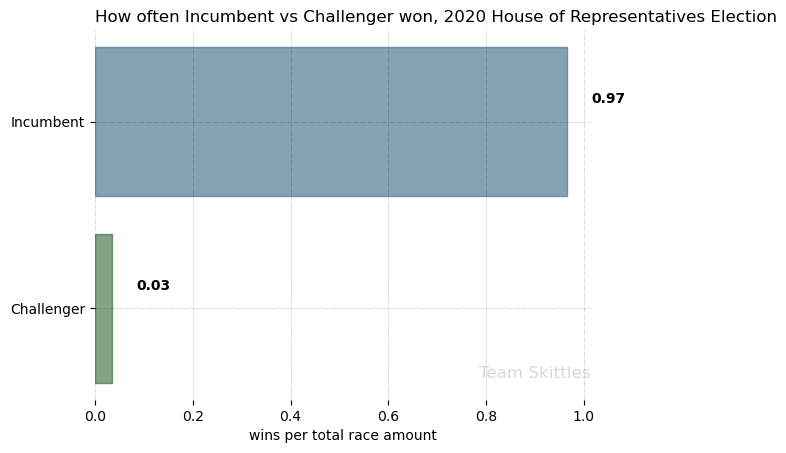

In [10]:
fig, ax = plt.subplots()
graph = ax.barh(CRPICO, proportion)
ax.set_title('How often Incumbent vs Challenger won, 2020 House of Representatives Election',
             loc ='left', )
plt.xlabel('wins per total race amount')

Incumbent_color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 
Challenger_color = (.2,
         .4,
         .5,
         .6
        )

graph[0].set_color(Incumbent_color)
graph[1].set_color(Challenger_color)

# Remove spine
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
# ax.xaxis.set_tick_params(pad = 5)
# ax.yaxis.set_tick_params(pad = 10)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='black',
             color ='black')

#Add x, y gridlines
ax.grid(color ='black',
       linestyle ='-.', linewidth = 0.5,
         alpha = 0.2)

# Add Text watermark
fig.text(0.9, 0.15, 'Team Skittles', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = .3);